In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.MonthlyCharges = pd.to_numeric(data.MonthlyCharges)

In [6]:
 data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [7]:
data[data.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
data = data.drop(index=data.index[data.TotalCharges.isna()])

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
new_data = pd.get_dummies(data,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'])

In [11]:
new_data.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One y

In [12]:
new_data = new_data.drop(['customerID','gender_Male', 'SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No',
       'MultipleLines_No phone service','OnlineSecurity_No','InternetService_DSL',
       'OnlineSecurity_No internet service','OnlineBackup_No', 'OnlineBackup_No internet service','DeviceProtection_No',
       'DeviceProtection_No internet service','TechSupport_No', 'TechSupport_No internet service','StreamingTV_No', 'StreamingTV_No internet service','StreamingMovies_No', 'StreamingMovies_No internet service','PaperlessBilling_No','PaymentMethod_Credit card (automatic)','Churn_No'],axis='columns')

In [13]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [14]:
new_data = new_data.rename({'InternetService_Fiber optic':'InternetService_Fiber_optic','Contract_Month-to-month':'Contract_Month_to_month','Contract_One year':'Contract_One_year','Contract_Two year':'Contract_Two_year','PaymentMethod_Bank transfer (automatic)':'PaymentMethod_Bank_transfer_automatic','PaymentMethod_Credit card (automatic)':'PaymentMethod_Credit_card_automatic','PaymentMethod_Electronic check':'PaymentMethod_Electronic_check','PaymentMethod_Mailed check':'PaymentMethod_Mailed_check'},axis='columns')

In [15]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'Churn_Yes'],
      dtype='object')

# Explorotary Data Analysis

EDA helps in Visualizing underlying insights from the data. It helps in Feature Enginerring also paves way for identifying new scope of data. As churn is the key field of study,first part of the notebook deals with the picturization of churn data based on different features.

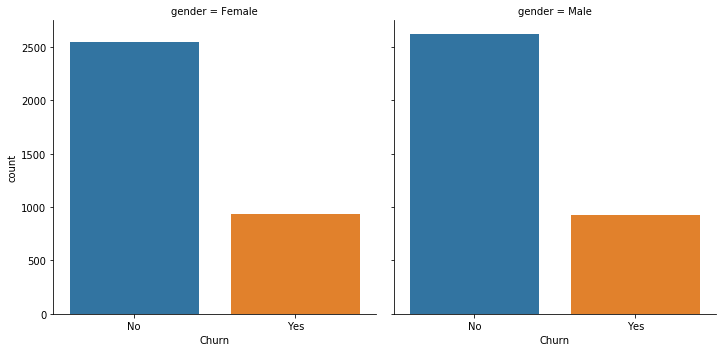

In [16]:
sns.catplot(x='Churn',col='gender',data = data,kind='count')

As from above chart churning rate looks similar for both male and female so there is __no significant difference in churning rate based on gender.__

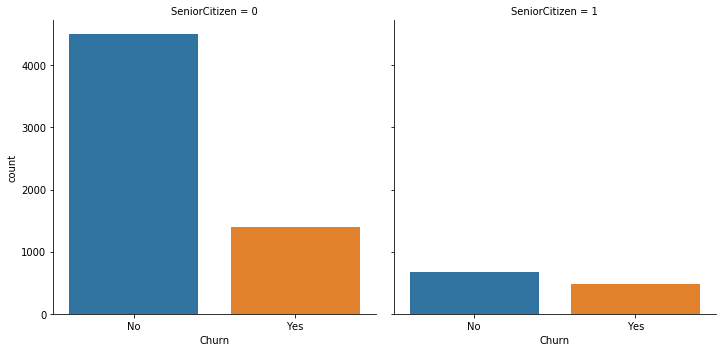

In [17]:
sns.catplot(x='Churn',col='SeniorCitizen',data = data,kind='count')

__It seems Senior citizens churned and not churned numbers have very less difference, also the number of Total Senior Citizens is less compared to remaining population.__

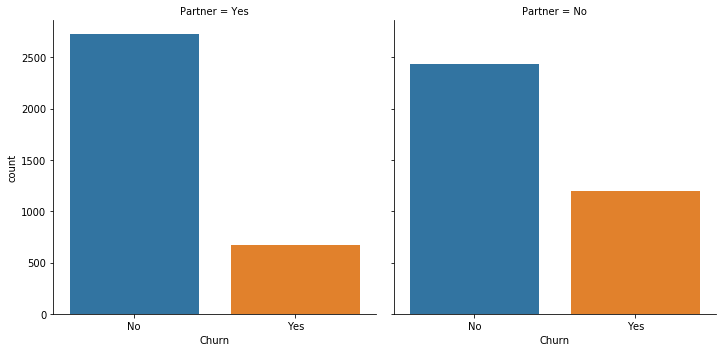

In [18]:
sns.catplot(x='Churn',col='Partner',data = data,kind='count')


__If there is no partner then churn rate is little higher.__

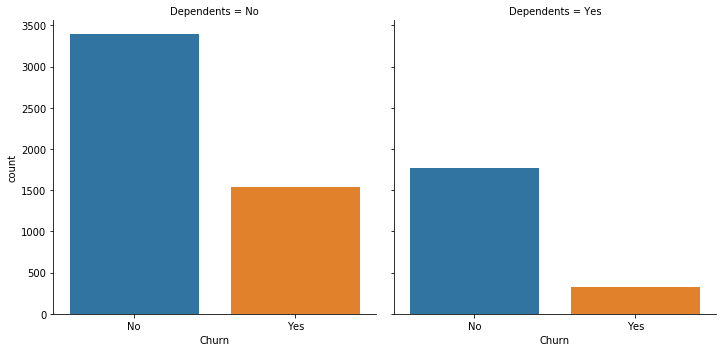

In [19]:
sns.catplot(x='Churn',col='Dependents',data = data,kind='count')

__If there are no Dependents then Churning numbers are higher__

In [20]:
data.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

Nearly only half of the total customers have Dependents, when there are dependents then churn rate is little less. It can be one of the feature can be considered but not very much primary.

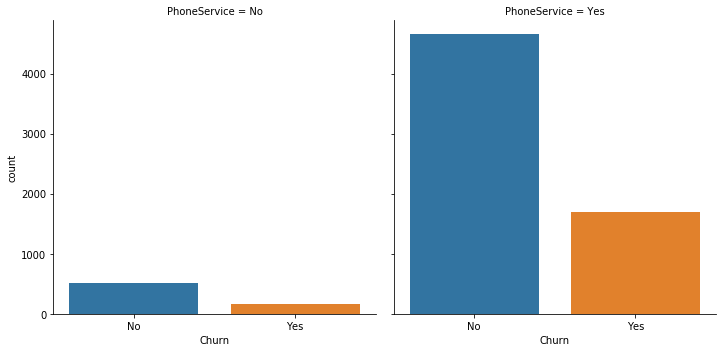

In [21]:
sns.catplot(x='Churn',col='PhoneService',data = data,kind='count')

In [22]:
data.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

Most of the Telcom customers have Phone service too, __Nearly 10% of them Phone Service customers are churned__

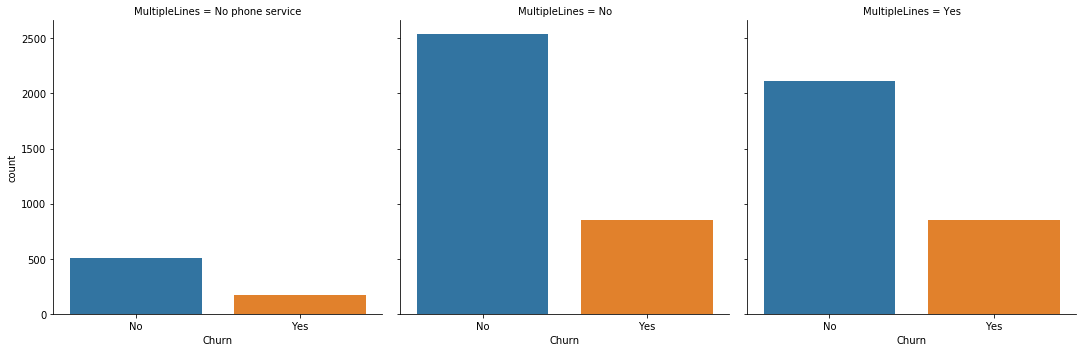

In [23]:
sns.catplot(x='Churn',col='MultipleLines',data = data,kind='count')

__Irrespective of customer have multiple lines or not the Churning numbers are same.__

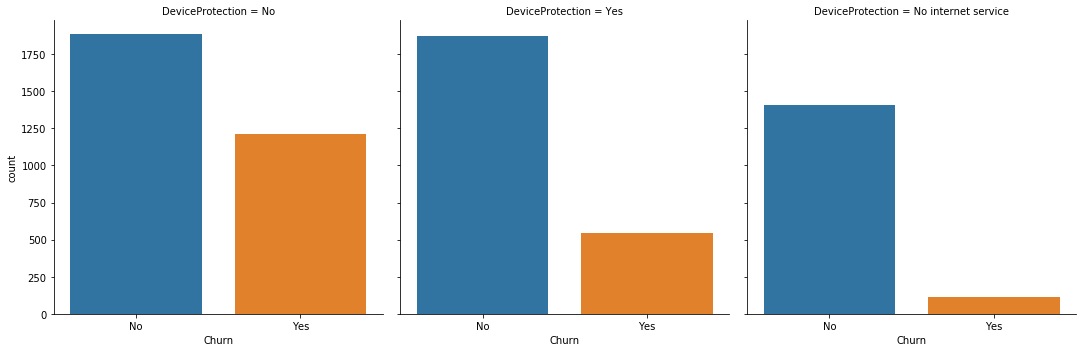

In [24]:
sns.catplot(x='Churn',col='DeviceProtection',data = data,kind='count')

__Customer without device protection churned higher__

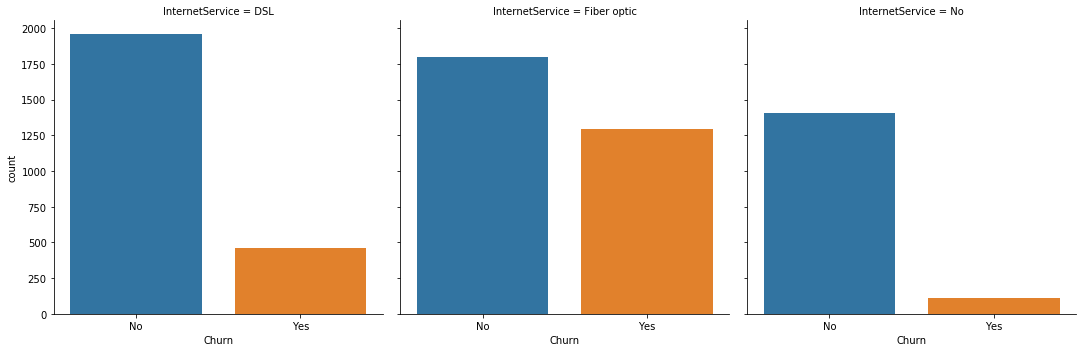

In [25]:
sns.catplot(x='Churn',col='InternetService',data = data,kind='count')

__Customers getting Internet Service by Fiber optics Churned more, so definetly that may be a important feature.__

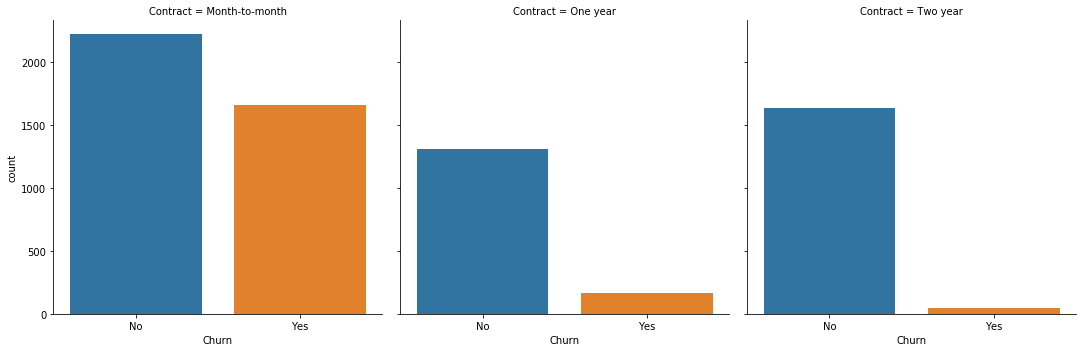

In [26]:
sns.catplot(x='Churn',col='Contract',data = data,kind='count')

__Customers chosen Month-to-month contract churned higher,this also may be a important feature__

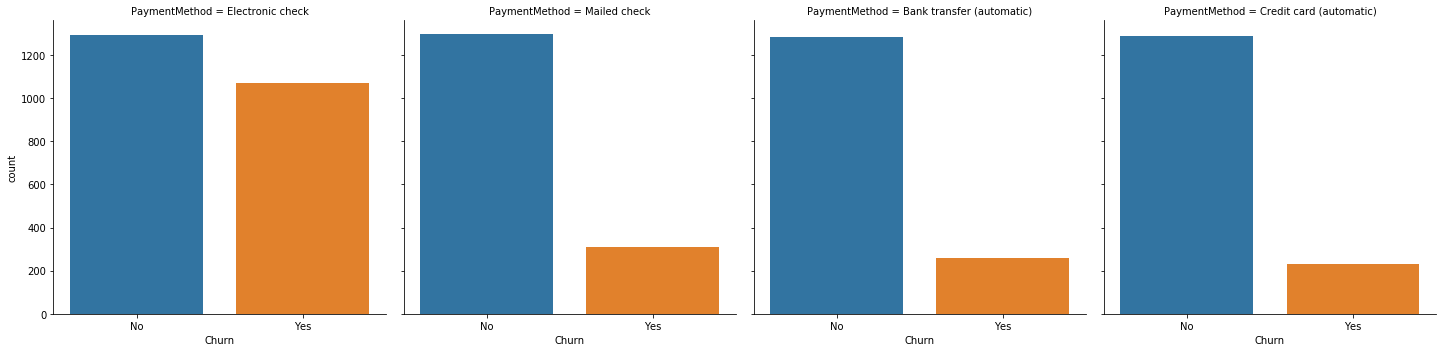

In [27]:
sns.catplot(x='Churn',col='PaymentMethod',data = data,kind='count')

__Customer paid by electronic check churned more__

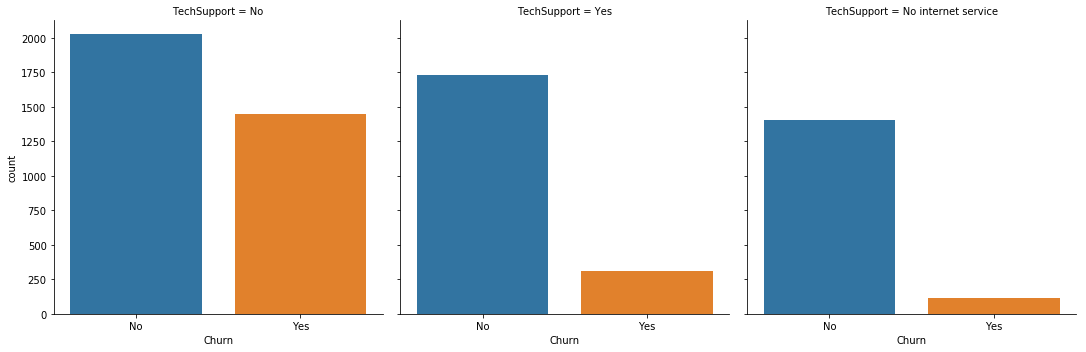

In [28]:
sns.catplot(x='Churn',col='TechSupport',data = data,kind='count')

__Customer without tech support churned higher than customer with tech support__

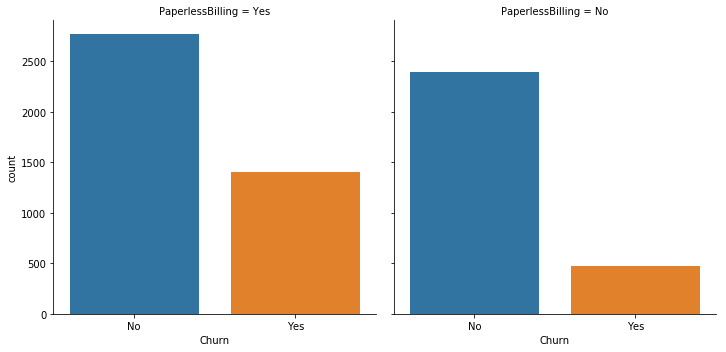

In [29]:
sns.catplot(x='Churn',col='PaperlessBilling',data = data,kind='count')

__Churning rate of paperless billing customer are greater than the billing sent by post customers__

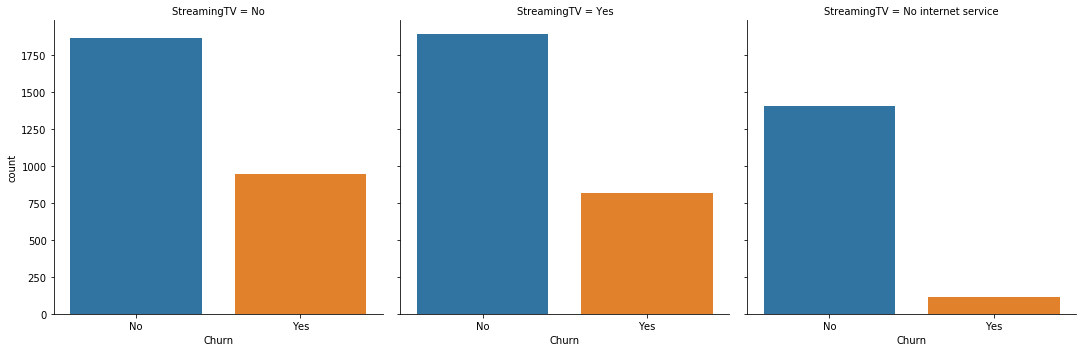

In [30]:
sns.catplot(x='Churn',col='StreamingTV',data = data,kind='count')

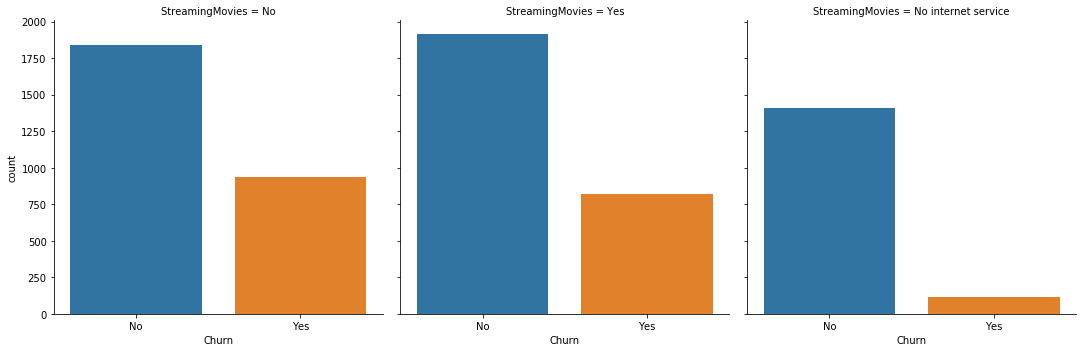

In [31]:
sns.catplot(x='Churn',col='StreamingMovies',data = data,kind='count')


__Both Streaming Tv and Streaming Movies have greater churn rate__

# Feature Engineering

From EDA __Internet Service,Contract,Payment Method,Streaming Tv and Streaming Movies,Tech Support are the Primary features and Paperless billing and Senior Citizen can be of secondary importance.__

In [32]:
from statsmodels.formula.api import logit
m = logit('Churn_Yes ~ gender_Female + tenure + MonthlyCharges + TotalCharges + SeniorCitizen_1 + Partner_Yes + Dependents_Yes + PhoneService_Yes + MultipleLines_Yes + InternetService_Fiber_optic + InternetService_No + OnlineSecurity_Yes + OnlineBackup_Yes +DeviceProtection_Yes + TechSupport_Yes+ StreamingTV_Yes + StreamingMovies_Yes + Contract_Month_to_month + Contract_One_year+ Contract_Two_year + PaperlessBilling_Yes + PaymentMethod_Electronic_check + PaymentMethod_Mailed_check',new_data).fit()
print(m.summary())

Optimization terminated successfully.
         Current function value: 0.414311
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7009
Method:                           MLE   Df Model:                           22
Date:                Mon, 24 Sep 2018   Pseudo R-squ.:                  0.2845
Time:                        12:08:59   Log-Likelihood:                -2913.4
converged:                       True   LL-Null:                       -4071.7
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.3202   3.87e+06   8.27e-08     

In [33]:
y = new_data['Churn_Yes'].values
X = new_data.drop(['Churn_Yes'], axis=1).values

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   45.2s finished

[2018-09-24 12:09:48] Features: 1/10 -- score: 0.7543736395618755[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   52.7s finished

[2018-09-24 12:10:41] Features: 2/10 -- score: 0.7878904256685388[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   50.6s finished

[2018-09-24 12:11:32] Features: 3/10 -- score: 0.7923644507491959[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   48.3s finished

[2018-09-24 12:12:20] Features: 4/10 -- score: 0.7907390526910933[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   4

[0, 4, 8, 9, 10, 16, 17, 18, 19, 23]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   34.4s finished

[2018-09-24 12:16:23] Features: 10/10 -- score: 0.7738780031447907

In [35]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'Churn_Yes'],
      dtype='object')

Tenure,MonthlyCharges,SeniorCitizen_1,PhoneService_Yes,InternetService_Fiber_optic,InternetService_No,Contract_Month_to_month,Contract_One_year,
       Contract_Two_year,PaymentMethod_Electronic_check

# Classification

Approaches for Predicting Qualitative Responses are called Classification. There are many classification techniques,widely used are __Logistic Regression,Decision Trees,SVM,Random Forest and XG Boost__. __Deep Learning__ also can be applied for classification problems.

__Confusion Matrix__	
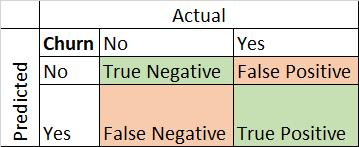


The above table is called the Confusion Matrix, it clearly helps in studying our model performance.

*  True Positive  - Actual Data point is positive and Predicted as positive
*  True Negative  - Actual Data point is negative and Predicted as negative
*  False Positive - Actual Data point is negative and Predicted as positive
*  False Negative - Actual Data point is positive and Predicted as negative.

From above four values two metrics are calculated 

*  __Precision = True Positives/(True Positives + False Positives)__
*  __Recall    = True Positives/(True Positives + False Negatives)__


Precision talks about out of Total predicted postive values how many are actually Positive. Recall talks about the Total positive values predicted right.

* __Cost of False Postive is high, then Precision is a good measure__
* __Cost of False Negative is high, then recall is a good measure.__


__For Customer churn classification, False Negative cost is high that is if a customer churned, is identified as not churned customer. So Recall is an important measure for this dataset.__

## Logistic Regression

__Logistic Regression__ models the __probability__that the output variable belongs to a particular category. Logistic Regression uses Logistic function as follows

                p(X) = e^(b0 + b1*X) / (1 + e^(b0 + b1*X))
                

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1152  148]
 [ 223  235]]
             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1300
          1       0.61      0.51      0.56       458

avg / total       0.78      0.79      0.78      1758



## Decision Trees

Decision Trees are non- non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 
*  Decision Trees can be able to handle both continuous and categorical data. 
*  The main disadvantage of Decision trees are it will create overcomplex trees that lead to __Overfitting__. It also create biased tree if one class dominates.

In [37]:
import model_evaluation_utils as meu
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

Dtree_predictions = Dtree.predict(X_test)

#meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=Dtree_predictions, 
                                    #  classes=b_test_labels)
    
from sklearn import metrics

print(confusion_matrix(y_test, Dtree_predictions))
print(classification_report(y_test, Dtree_predictions))

print (metrics.accuracy_score(y_test,Dtree_predictions))

[[1033  267]
 [ 229  229]]
             precision    recall  f1-score   support

          0       0.82      0.79      0.81      1300
          1       0.46      0.50      0.48       458

avg / total       0.73      0.72      0.72      1758

0.7178612059158134


## Random Forest

In Random Forest each tree is built from samples wit replacement from training set. Split is not chosen as the best split among features instead built from random subset of features.

In [38]:
from sklearn.ensemble import RandomForestClassifier
# train the model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
# predict and evaluate performance
RF_predictions = RF.predict(X_test)

print(confusion_matrix(y_test, RF_predictions))
print(classification_report(y_test, RF_predictions))

print (metrics.accuracy_score(y_test,RF_predictions))

[[1159  141]
 [ 250  208]]
             precision    recall  f1-score   support

          0       0.82      0.89      0.86      1300
          1       0.60      0.45      0.52       458

avg / total       0.76      0.78      0.77      1758

0.7775881683731513


## SVM

*  SVM - Support Vector Machines are very effective in high dimensional spaces.
*  Rather than simply drawing a zero-width line between the classes, margin of some width can be drawn around each line, up to the nearest point.

In [39]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)

# predict and evaluate performance
sv_predictions = sv.predict(X_test)

print(confusion_matrix(y_test, sv_predictions))
print(classification_report(y_test, sv_predictions))

print (metrics.accuracy_score(y_test,sv_predictions))

[[1224   76]
 [ 344  114]]
             precision    recall  f1-score   support

          0       0.78      0.94      0.85      1300
          1       0.60      0.25      0.35       458

avg / total       0.73      0.76      0.72      1758

0.7610921501706485


## XG Boost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

In [40]:
import xgboost as xgb
xgb = xgb.XGBClassifier(seed=42)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

print (metrics.accuracy_score(y_test,xgb_predictions))

[[1169  131]
 [ 236  222]]
             precision    recall  f1-score   support

          0       0.83      0.90      0.86      1300
          1       0.63      0.48      0.55       458

avg / total       0.78      0.79      0.78      1758

0.7912400455062572


C:\Users\Sivakumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Deep Learning

In [41]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target


target = to_categorical(new_data.Churn_Yes)
n_cols = X.shape[1]

A_train, A_test, b_train, b_test = train_test_split(X, target, test_size = 0.25, random_state=42)
model = Sequential()

# Add the first layer
model.add(Dense(64,activation='relu',input_shape=(n_cols,)))

model.add(Dense(64,activation='relu'))
# Add the output layer

model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(A_train,b_train,epochs=100)


C:\Users\Sivakumar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
5274/5274 [==============================] - 2s 335us/step - loss: 3.0065 - acc: 0.7311
Epoch 2/100
5274/5274 [==============================] - 0s 47us/step - loss: 2.6574 - acc: 0.7372
Epoch 3/100
5274/5274 [==============================] - 0s 46us/step - loss: 2.4148 - acc: 0.7476
Epoch 4/100
5274/5274 [==============================] - 0s 45us/step - loss: 3.0260 - acc: 0.7349
Epoch 5/100
5274/5274 [==============================] - 0s 46us/step - loss: 2.5970 - acc: 0.7543
Epoch 6/100
5274/5274 [==============================] - 0s 44us/step - loss: 2.3121 - acc: 0.7353
Epoch 7/100
5274/5274 [==============================] - 0s 44us/step - loss: 2.0924 - acc: 0.7516
Epoch 8/100
5274/5274 [==============================] - 0s 44us/step - loss: 2.2452 - acc: 0.7526
Epoch 9/100
5274/5274 [==============================] - 0s 44us/step - loss: 2.3750 - acc: 0.7491
Epoch 10/100
5274/5274 [==============================] - 0s 44us/step - loss: 1.7016 - acc: 0.7380
Epoch 11

5274/5274 [==============================] - 0s 44us/step - loss: 0.4257 - acc: 0.7984
Epoch 84/100
5274/5274 [==============================] - 0s 41us/step - loss: 0.4269 - acc: 0.7977
Epoch 85/100
5274/5274 [==============================] - 0s 43us/step - loss: 0.4252 - acc: 0.7992
Epoch 86/100
5274/5274 [==============================] - 0s 49us/step - loss: 0.4242 - acc: 0.8020
Epoch 87/100
5274/5274 [==============================] - 0s 66us/step - loss: 0.4203 - acc: 0.8013
Epoch 88/100
5274/5274 [==============================] - 0s 69us/step - loss: 0.4288 - acc: 0.7996
Epoch 89/100
5274/5274 [==============================] - 0s 54us/step - loss: 0.4202 - acc: 0.8070
Epoch 90/100
5274/5274 [==============================] - 0s 55us/step - loss: 0.4251 - acc: 0.7979
Epoch 91/100
5274/5274 [==============================] - 0s 53us/step - loss: 0.4354 - acc: 0.7960
Epoch 92/100
5274/5274 [==============================] - 0s 52us/step - loss: 0.4321 - acc: 0.7983
Epoch 93/100


In [42]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [43]:
len(y_test)

1758

In [44]:
import collections
collections.Counter(y_test)

Counter({0: 1300, 1: 458})

# SMOTE

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1411
Before OverSampling, counts of label '0': 3863 



In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [47]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 3863
After OverSampling, counts of label '0': 3863


## Logistic regression after SMOTE

In [48]:
logreg_smote = LogisticRegression()

# Fit the classifier to the training data
logreg_smote.fit(X_train_res,y_train_res.ravel())

# Predict the labels of the test set: y_pred
y_pred = logreg_smote.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn import metrics

print (metrics.accuracy_score(y_test,y_pred))
from sklearn.metrics import matthews_corrcoef
print (matthews_corrcoef(y_test,y_pred))

[[947 353]
 [ 93 365]]
             precision    recall  f1-score   support

          0       0.91      0.73      0.81      1300
          1       0.51      0.80      0.62       458

avg / total       0.81      0.75      0.76      1758

0.7463026166097838
0.46915844115220157


## Decision Tree - SMOTE

In [49]:
Dtree_smote = DecisionTreeClassifier()
Dtree_smote.fit(X_train_res,y_train_res)

Dtree_predictions_smote = Dtree_smote.predict(X_test)

#meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=Dtree_predictions, 
                                    #  classes=b_test_labels)
    
from sklearn import metrics

print(confusion_matrix(y_test, Dtree_predictions_smote))
print(classification_report(y_test, Dtree_predictions_smote))

print (metrics.accuracy_score(y_test,Dtree_predictions_smote))

[[1030  270]
 [ 220  238]]
             precision    recall  f1-score   support

          0       0.82      0.79      0.81      1300
          1       0.47      0.52      0.49       458

avg / total       0.73      0.72      0.73      1758

0.7212741751990899


## Random Forest

In [50]:
RF_smote = RandomForestClassifier()
RF_smote.fit(X_train_res, y_train_res)
# predict and evaluate performance
RF_predictions_smote = RF_smote.predict(X_test)

print(confusion_matrix(y_test, RF_predictions_smote))
print(classification_report(y_test, RF_predictions_smote))

print (metrics.accuracy_score(y_test,RF_predictions_smote))

[[1139  161]
 [ 248  210]]
             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1300
          1       0.57      0.46      0.51       458

avg / total       0.75      0.77      0.76      1758

0.767349260523322


## SVM with SMOTE

In [51]:
sv_smote = svm.SVC()
sv_smote.fit(X_train_res, y_train_res)
# predict and evaluate performance
sv_predictions_smote = sv_smote.predict(X_test)

print(confusion_matrix(y_test, sv_predictions_smote))
print(classification_report(y_test, sv_predictions_smote))

print (metrics.accuracy_score(y_test,sv_predictions_smote))

[[1092  208]
 [ 256  202]]
             precision    recall  f1-score   support

          0       0.81      0.84      0.82      1300
          1       0.49      0.44      0.47       458

avg / total       0.73      0.74      0.73      1758

0.7360637087599545


## XGBoost

In [52]:
import xgboost as xgb
xgb_smote = xgb.XGBClassifier(seed=42)
xgb_smote.fit(X_train_res, y_train_res)
xgb_predictions_smote = xgb_smote.predict(X_test)
print(confusion_matrix(y_test, xgb_predictions_smote))
print(classification_report(y_test, xgb_predictions_smote))

print (metrics.accuracy_score(y_test,xgb_predictions_smote))

[[1111  189]
 [ 194  264]]
             precision    recall  f1-score   support

          0       0.85      0.85      0.85      1300
          1       0.58      0.58      0.58       458

avg / total       0.78      0.78      0.78      1758

0.7821387940841866


C:\Users\Sivakumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


##  with less features Tenure,MonthlyCharges,SeniorCitizen_1,PhoneService_Yes,InternetService_Fiber_optic,InternetService_No,Contract_Month_to_month,Contract_One_year, Contract_Two_year,PaymentMethod_Electronic_check

In [53]:
new_data.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'Churn_Yes'],
      dtype='object')

In [54]:
y1 = new_data['Churn_Yes'].values
X1 = new_data[['InternetService_Fiber_optic','SeniorCitizen_1',
       'InternetService_No','Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year','PaymentMethod_Bank_transfer_automatic',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']].values

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Create training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=42)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X1_train_res, y1_train_res = sm.fit_sample(X1_train, y1_train)

## Logistic Regression

In [55]:
logreg_f = LogisticRegression()

# Fit the classifier to the training data
logreg_f.fit(X1_train_res,y1_train_res)

# Predict the labels of the test set: y_pred
y_pred_f = logreg_f.predict(X1_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y1_test, y_pred_f))
print(classification_report(y1_test, y_pred_f))
from sklearn import metrics

print (metrics.accuracy_score(y1_test,y_pred_f))
print(matthews_corrcoef(y1_test,y_pred_f))

[[861 439]
 [ 86 372]]
             precision    recall  f1-score   support

          0       0.91      0.66      0.77      1300
          1       0.46      0.81      0.59       458

avg / total       0.79      0.70      0.72      1758

0.7013651877133106
0.4178178931794868


## XG Boost

In [56]:
xgb_f = xgb.XGBClassifier(seed=42)
xgb_f.fit(X1_train_res, y1_train_res)
xgb_predictions_f = xgb_f.predict(X1_test)
print(confusion_matrix(y1_test, xgb_predictions_f))
print(classification_report(y1_test, xgb_predictions_f))

print (metrics.accuracy_score(y1_test,xgb_predictions_f))
print(matthews_corrcoef(y1_test,xgb_predictions_f))

[[892 408]
 [ 99 359]]
             precision    recall  f1-score   support

          0       0.90      0.69      0.78      1300
          1       0.47      0.78      0.59       458

avg / total       0.79      0.71      0.73      1758

0.71160409556314
0.41597253798357825


C:\Users\Sivakumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Random Forest

In [57]:
RF_f = RandomForestClassifier()
RF_f.fit(X1_train_res, y1_train_res)
# predict and evaluate performance
RF_predictions_f = RF_f.predict(X1_test)

print(confusion_matrix(y1_test, RF_predictions_f))
print(classification_report(y1_test, RF_predictions_f))

print (metrics.accuracy_score(y1_test,RF_predictions_f))
print(matthews_corrcoef(y1_test,RF_predictions_f))

[[893 407]
 [ 99 359]]
             precision    recall  f1-score   support

          0       0.90      0.69      0.78      1300
          1       0.47      0.78      0.59       458

avg / total       0.79      0.71      0.73      1758

0.7121729237770194
0.4167150304509077


## SVM

In [58]:
sv_f = svm.SVC()
sv_f.fit(X1_train_res, y1_train_res)
# predict and evaluate performance
sv_predictions_f = sv_f.predict(X1_test)

print(confusion_matrix(y1_test, sv_predictions_f))
print(classification_report(y1_test, sv_predictions_f))

print (metrics.accuracy_score(y1_test,sv_predictions_f))
print(matthews_corrcoef(y1_test,sv_predictions_f))

[[832 468]
 [ 79 379]]
             precision    recall  f1-score   support

          0       0.91      0.64      0.75      1300
          1       0.45      0.83      0.58       458

avg / total       0.79      0.69      0.71      1758

0.6888509670079636
0.4106721748908771
